In [3]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [27]:
df = load_housing_data()

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [31]:
import matplotlib.pyplot as plt

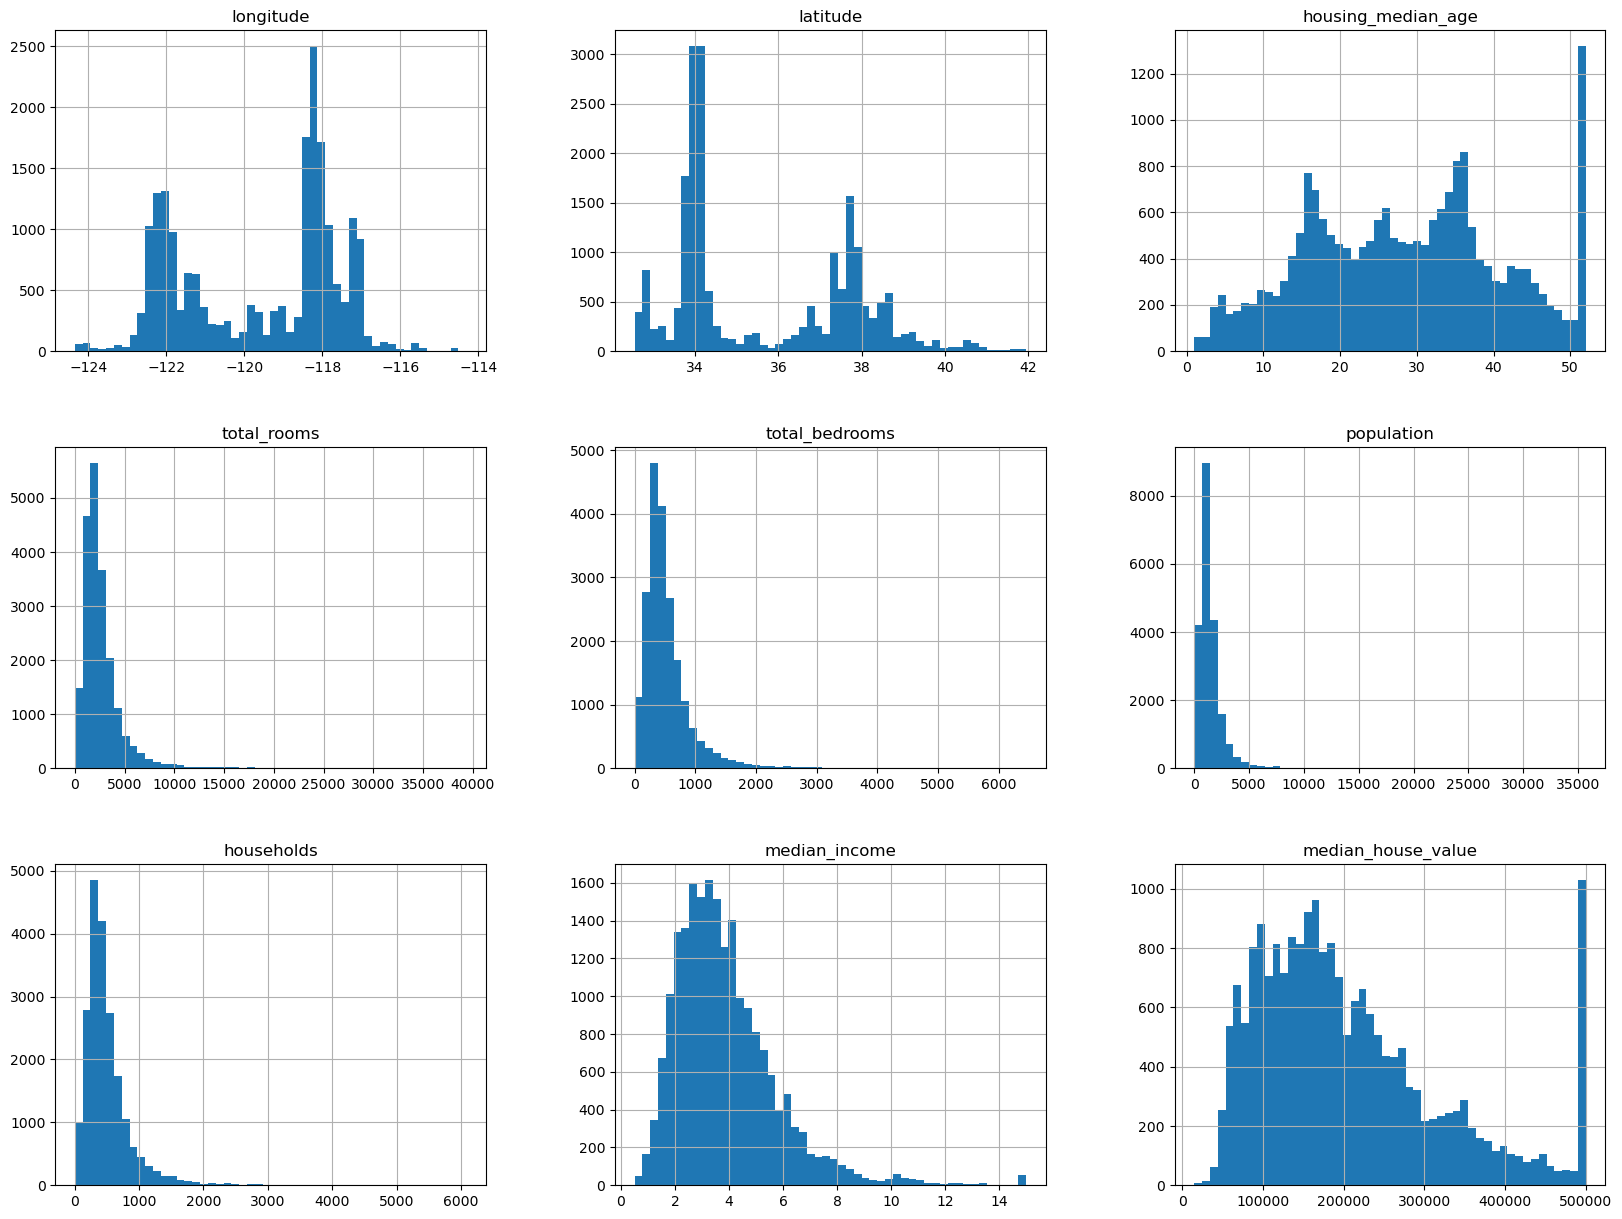

In [32]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test = train_test_split(df,test_size = 0.2)

In [35]:
len(x_test)/len(df)

0.2

In [36]:
from sklearn import linear_model

In [37]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity']]

x.ocean_proximity = x.ocean_proximity.map({'<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'NEAR BAY':4, 'ISLAND':5})


C:\Users\maksd\AppData\Local\Temp\ipykernel_10788\4128031376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.ocean_proximity = x.ocean_proximity.map({'<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'NEAR BAY':4, 'ISLAND':5})


In [40]:
x.ocean_proximity.value_counts()

ocean_proximity
1    9136
2    6551
3    2658
4    2290
5       5
Name: count, dtype: int64

In [41]:
y = df['median_house_value']

In [42]:
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression()

In [43]:
lm.coef_

array([-4.28415326e+04, -4.25187684e+04,  1.15086243e+03, -5.07962008e+00,
        5.74201435e+01, -4.11121262e+01,  9.99923232e+01,  3.92754970e+04,
       -1.41571571e+03])

In [ ]:
lm.predict